# Site promiscuity

In [ ]:
from katlas.core import *
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from katlas.plot import *
import matplotlib.ticker as mticker

In [ ]:
df=Data.get_ks_dataset()

In [ ]:
df.head()

,kin_sub_site,kinase_uniprot,substrate_uniprot,site,source,substrate_genes,substrate_phosphoseq,position,site_seq,sub_site,substrate_sequence,kinase_on_tree,kinase_genes,kinase_group,kinase_family,kinase_pspa_big,kinase_pspa_small,kinase_coral_ID,num_kin
0,O00141_A4FU28_S140,O00141,A4FU28,S140,Sugiyama,CTAGE9,MEEPGATPQPYLGLVLEELGRVVAALPESMRPDENPYGFPSELVVC...,140,AAAEEARSLEATCEKLSRsNsELEDEILCLEKDLKEEKSKH,A4FU28_S140,MEEPGATPQPYLGLVLEELGRVVAALPESMRPDENPYGFPSELVVC...,1,SGK1 SGK,AGC,SGK,Basophilic,Akt/rock,SGK1,22
1,O00141_O00141_S252,O00141,O00141,S252,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,252,SQGHIVLTDFGLCKENIEHNsTtstFCGtPEyLAPEVLHKQ,O00141_S252,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,1,SGK1 SGK,AGC,SGK,Basophilic,Akt/rock,SGK1,1
2,O00141_O00141_S255,O00141,O00141,S255,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,255,HIVLTDFGLCKENIEHNsTtstFCGtPEyLAPEVLHKQPYD,O00141_S255,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,1,SGK1 SGK,AGC,SGK,Basophilic,Akt/rock,SGK1,1
3,O00141_O00141_S397,O00141,O00141,S397,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,397,sGPNDLRHFDPEFTEEPVPNsIGKsPDsVLVTAsVKEAAEA,O00141_S397,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,1,SGK1 SGK,AGC,SGK,Basophilic,Akt/rock,SGK1,1
4,O00141_O00141_S404,O00141,O00141,S404,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,404,HFDPEFTEEPVPNsIGKsPDsVLVTAsVKEAAEAFLGFsYA,O00141_S404,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,1,SGK1 SGK,AGC,SGK,Basophilic,Akt/rock,SGK1,1


## Total kinase count per site

In [ ]:
pivot = pd.crosstab(df['sub_site'], df['substrate_uniprot'])

hist_data = pivot.sum(1)  # total kinase count per sub_site

# Define bins and labels
bins = [0, 1, 10, 100, 300]
labels = ['1', '2~10', '11~100', '101~300']

# Cut into categories
binned = pd.cut(hist_data, bins=bins, labels=labels, right=True, include_lowest=True)

# Count how many kin_sub_sites fall into each bin
binned_counts = binned.value_counts().sort_index()

sites = pd.concat([hist_data,binned],axis=1)

sites.columns=['num_kin','bin']

sites = sites.reset_index()

## Plot sites kin distribution

In [ ]:
# pip install brokenaxes

In [ ]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

import pandas as pd
import numpy as np

In [ ]:
set_sns(100)

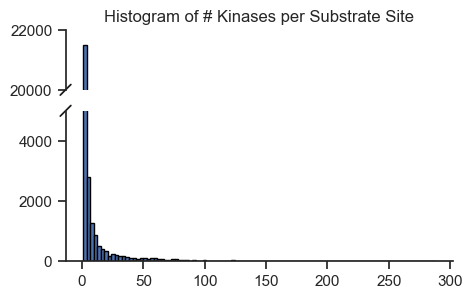

In [ ]:
fig = plt.figure(figsize=(5, 4))
bax = brokenaxes(ylims=((0, 5000), (20_000, 22_000)), hspace=0.2)

# Plot histogram
bax.hist(sites.num_kin, bins=100, edgecolor='black');

# bax.set_xlabel('# Kinases')
# bax.set_ylabel('Frequency') # overlap, does not work very well
plt.title('Histogram of # Kinases per Substrate Site');
save_pdf('fig/promi_hist.pdf')

In [ ]:
cnt=sites.bin.value_counts()

In [ ]:
def plot_pie(value_counts, # value counts
             hue_order=None, # list of strings
             labeldistance=0.8,
             fontsize=12,
             fontcolor='black',
             palette='tab20' ,
             figsize=(4,3)
            ):
    if hue_order is not None: value_counts = value_counts.reindex(hue_order)
    colors = sns.color_palette(palette, n_colors=len(value_counts))
    value_counts.plot.pie(
        autopct='%1.1f%%',    # Show percentage inside slices
        labeldistance=labeldistance,    # Move labels closer to center
        textprops={'fontsize': fontsize, 'color': fontcolor} ,
        colors=colors,
        figsize=figsize,
    )
    plt.ylabel('')
    plt.title(f'n={value_counts.sum():,}')

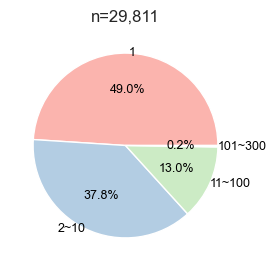

In [ ]:
plot_pie(cnt,
         fontsize=9,labeldistance=1,palette='Pastel1')
save_pdf('fig/promi_pie.pdf')

In [ ]:
def plot_cnt(cnt, xlabel=None,ylabel='Count',figsize=(6, 3)):
    fig, ax = plt.subplots(figsize=figsize)
    cnt.plot.bar(ax=ax)
    # Add text on top of each bar
    for idx, value in enumerate(cnt):
        ax.text(idx, value + 0.5, f"{value:,}", ha='center', va='bottom', fontsize=10)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.xticks(rotation=0)
    plt.tight_layout()

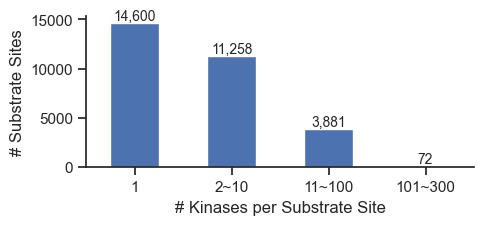

In [ ]:
plot_cnt(cnt,
         xlabel='# Kinases per Substrate Site',
         ylabel='# Substrate Sites',
         figsize=(5,2.4)
        )
save_pdf('fig/promi_bar.pdf')

In [ ]:
# sites.num_kin.sort_values(ascending=False).to_csv('test.csv')

## Characterize promicuous motif

In [ ]:
seqs = Data.get_ks_unique()

In [ ]:
seqs

,sub_site,num_kin,bin,sub_genes,site_seq,source_combine,acceptor,O00141_SGK1,O00238_BMPR1B,O00311_CDC7,...,Q9Y2K2_SIK3,Q9Y2U5_MAP3K2,Q9Y3S1_WNK2,Q9Y463_DYRK1B,Q9Y4K4_MAP4K5,Q9Y572_RIPK3,Q9Y5S2_CDC42BPB,Q9Y6E0_STK24,Q9Y6M4_CSNK1G3,Q9Y6R4_MAP3K4
0,A0A2R8Y4L2_S158,1,1,HNRNPA1L3 HNRNPA1P48,TDRGSGKKRGFAFVTFDDHDsVDKIVIQKYHTVNGHNCEVR,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A0A2R8Y4L2_S22,3,2~10,HNRNPA1L3 HNRNPA1P48,SKSEsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTD,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A0A2R8Y4L2_S6,3,2~10,HNRNPA1L3 HNRNPA1P48,_______________MSKSEsPKEPEQLRKLFIGGLsFEtT,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A0A2R8Y4L2_S95,65,11~100,HNRNPA1L3 HNRNPA1P48,RPHKVDGRVVEPKRAVSREDsQRPDAHLTVKKIFVGGIKED,Sugiyama,S,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,A0A2R8Y4L2_T25,3,2~10,HNRNPA1L3 HNRNPA1P48,EsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTDCVV,Sugiyama,T,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29806,Q9Y6Y8_S894,2,2~10,SEC23IP MSTP053,FISSLKSAWQTLNEFARAHtsstQLQEELEKVANQIKEEEE,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29807,Q9Y6Y8_T893,4,2~10,SEC23IP MSTP053,GFISSLKSAWQTLNEFARAHtsstQLQEELEKVANQIKEEE,Sugiyama,T,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29808,Q9Y6Y8_Y935,2,2~10,SEC23IP MSTP053,KQVVEAEKVVEsPDFsKDEDyLGKVGMLNGGRRIDYVLQEK,Sugiyama,Y,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29809,Q9Y6Y9_Y131,1,1,LY96 ESOP1 MD2,ETVNTTISFSFKGIKFSKGKyKCVVEAISGSPEEMLFCLEF,Non-Sugiyama,Y,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
seq_map=df.drop_duplicates('sub_site').set_index('sub_site').site_seq

gene_map = df.drop_duplicates('sub_site').set_index('sub_site').substrate_genes


In [ ]:
sites['sub_genes'] = sites.sub_site.map(gene_map)
sites['site_seq'] = sites.sub_site.map(seq_map)

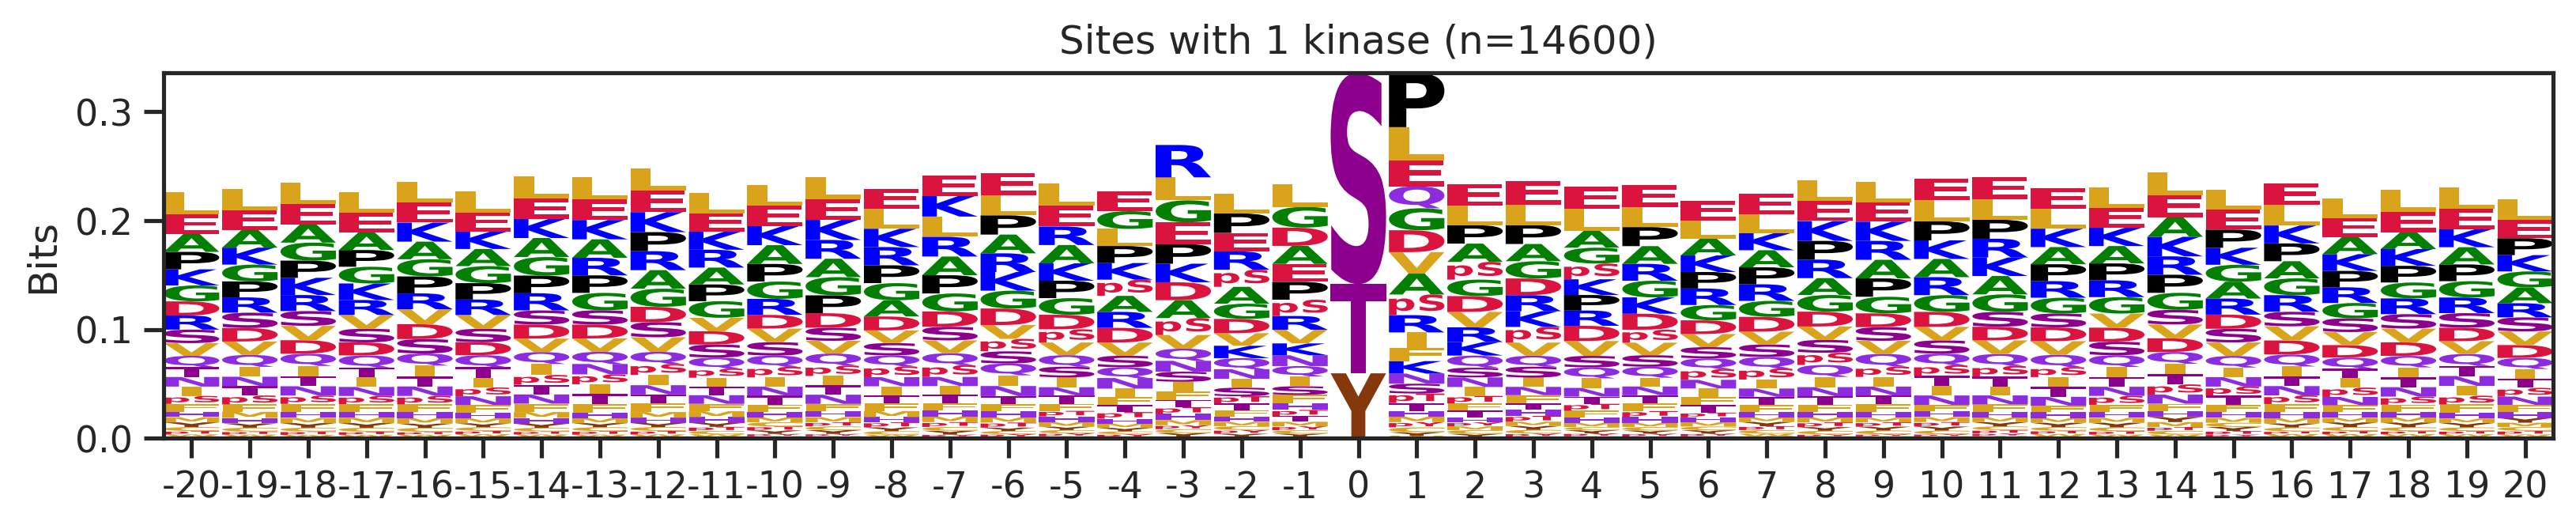

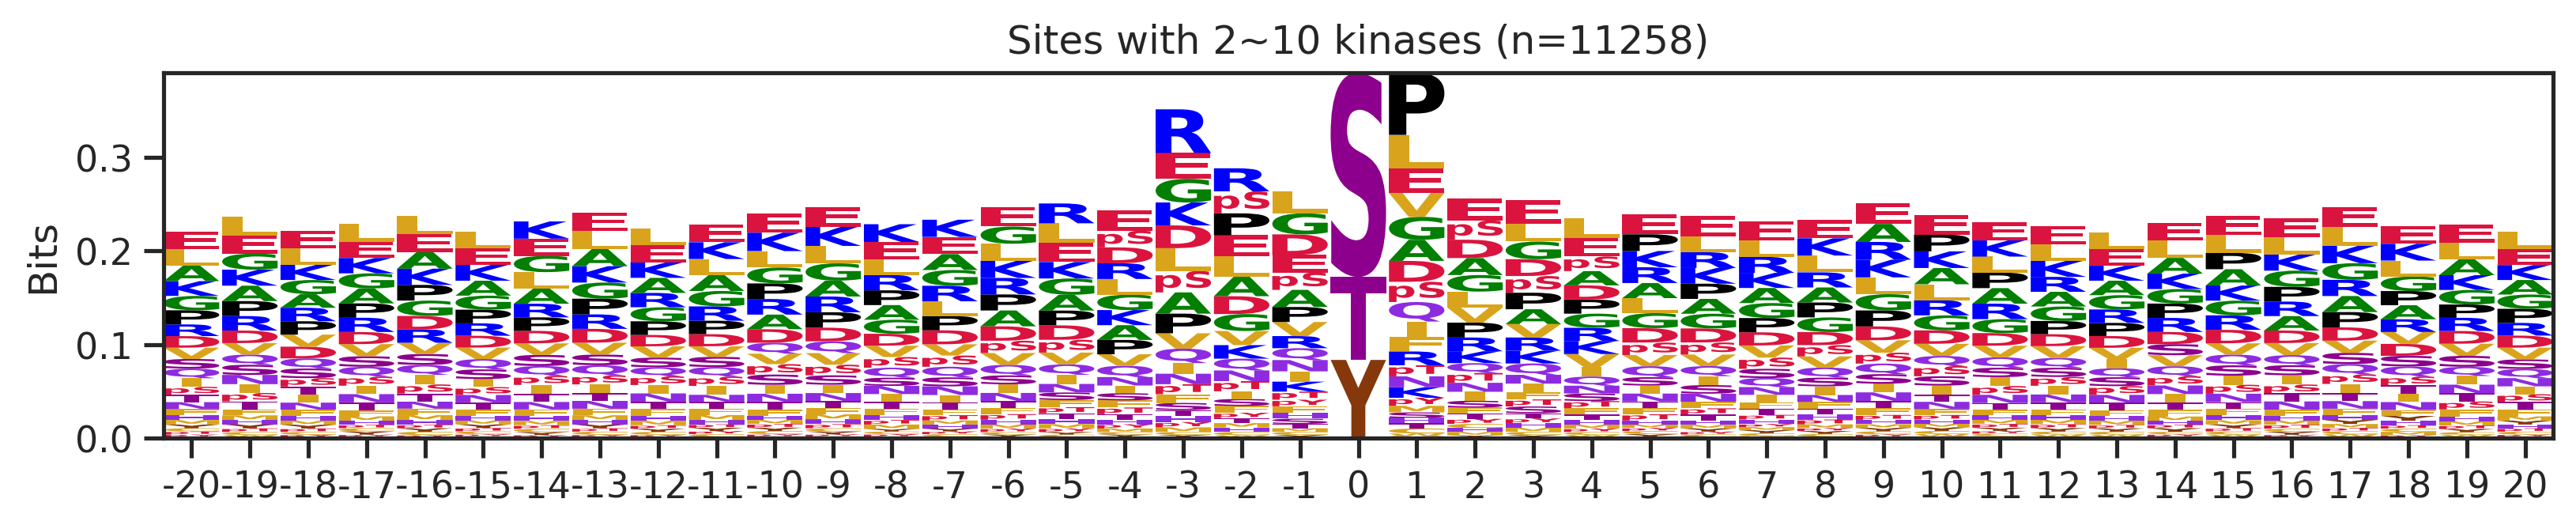

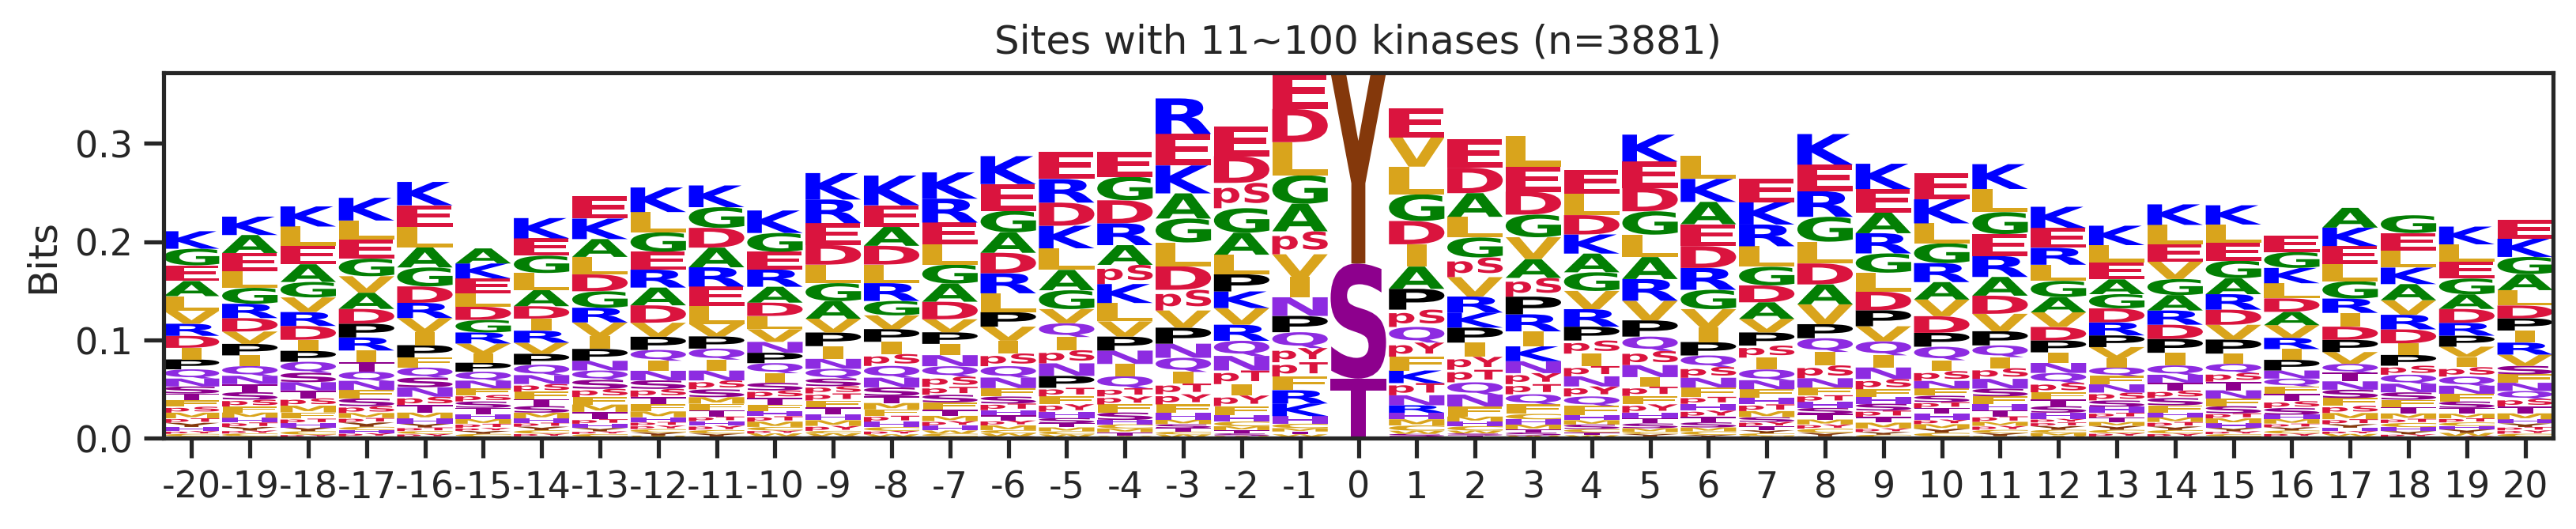

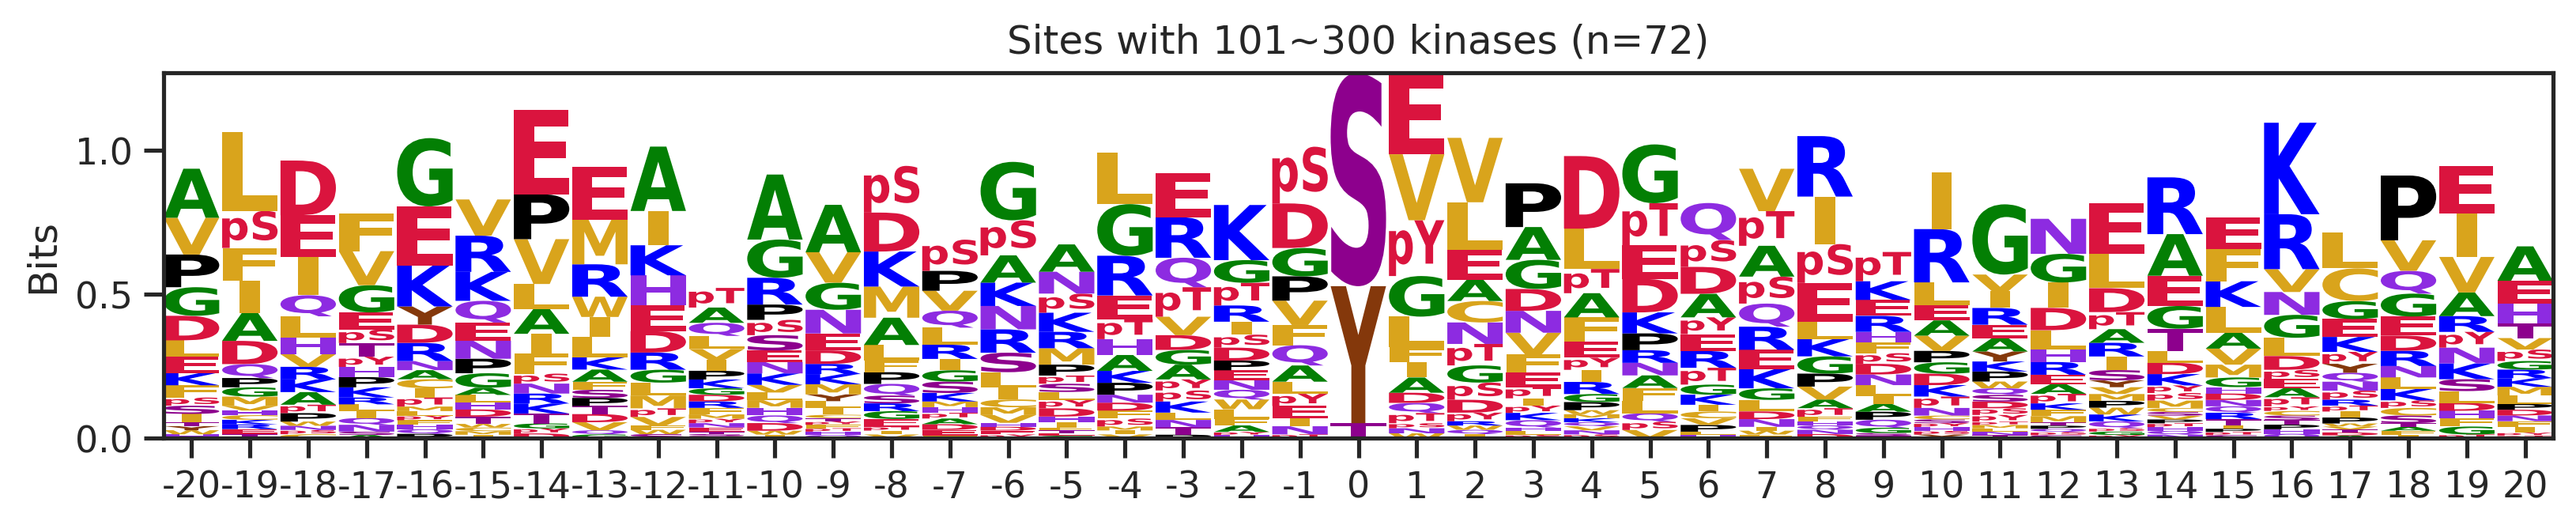

In [ ]:
for b in sites.bin.value_counts().index:
    sites_b=sites[sites.bin==b].copy()
    pssm_df= get_prob(sites_b,'site_seq')
    plot_logo(pssm_df,b,figsize=(13,2))
    kin_str='kinase' if b=='1' else 'kinases'
    plt.title(f"Sites with {b} {kin_str} (n={len(sites_b)})")
    plt.show()
    plt.close()

In [ ]:
# a = sites[(sites.bin=='101~300')|(sites.bin=='11~100')].copy()

# s_sites = a[a.sub_site.str.split('_').str[1].str[0]=='S']

# y_sites = a[a.sub_site.str.split('_').str[1].str[0]=='Y']

# pssm_df_s = get_prob(s_sites,'site_seq')
# pssm_df_y = get_prob(y_sites,'site_seq')

## Genes in promicuous site

In [ ]:
sites['gene'] = sites.sub_genes.str.split(' ').str[0]

In [ ]:
sites_b=sites[sites.bin=='101~300'].copy()


In [ ]:
data = pd.read_csv('raw/genes_grouped.csv')

In [ ]:
data.Gene.isin(genes).sum()

72

In [ ]:
# remove (small) and (large) for rebosomal protein
data.Group = data.Group.str.split('(').str[0]

In [ ]:
group_map = data.set_index('Gene')['Group'].to_dict()

In [ ]:
sites_b['gene_group'] = sites_b.gene.map(group_map)

In [ ]:
sites_b.gene_group.value_counts()

gene_group
Glycolysis                 16
Actin cytoskeleton         15
Heat shock protein         12
Ribosomal protein          12
RNA‑binding protein         6
POTE family                 3
NME family                  2
Signaling/regulatory        2
Tubulin cytoskeleton        2
Cytoskeleton‑associated     1
Regulatory/other            1
Name: count, dtype: int64

## Stacked by source

In [ ]:
def convert_source(x):
    if x == "Sugiyama":
        return x
    elif 'Sugiyama' in x and '|' in x:
        return 'Both'
    elif 'Sugiyama' not in x:
        return 'Non-Sugiyama'

In [ ]:
# df=Data.get_ks_dataset()

In [ ]:
df['source2'] = df.source.apply(convert_source)

In [ ]:
out = df.groupby('sub_site')['source2'].unique()

In [ ]:
sites['source'] = sites.sub_site.map(out)

In [ ]:
def combine_source(sources):
    sources = set(sources)  # remove duplicates
    if sources == {'Sugiyama'}:
        return 'Sugiyama'
    elif sources == {'Non-Sugiyama'}:
        return 'Non-Sugiyama'
    else:
        return 'Both'

In [ ]:
sites['source_num'] = sites.source.str.len()

In [ ]:
sites['source_combine'] = sites.source.apply(combine_source)

In [ ]:
def get_pct(df,bin_col, hue_col):
    count_df = df.groupby([bin_col, hue_col], observed=False).size().unstack(fill_value=0)
    pct_df = count_df.div(count_df.sum(axis=1), axis=0) * 100
    return pct_df

In [ ]:
pct_df = get_pct(sites,'bin','source_combine')

In [ ]:
pct_df

source_combine,Both,Non-Sugiyama,Sugiyama
bin,,,
1,1.102740,47.445205,51.452055
2~10,7.470243,30.582697,61.947060
11~100,7.137336,1.056429,91.806236
101~300,12.500000,0.000000,87.500000


In [ ]:
# pct_df.plot.bar()
# plt.legend(title='Source')

In [ ]:
def get_plt_color(palette, # dict, list, or set name (tab10)
                  columns, # columns in the df for plot
                 ):
    "Given a dict, list or set name, return the list of names; if dict, need to provide column names of the df."
    if isinstance(palette, dict):
        # Match colors to column order in pct_df
        colors = [palette.get(col, '#cccccc') for col in columns]  # fallback color if missing
    elif isinstance(palette, str):
        colors = sns.color_palette(palette, n_colors=len(columns))
    elif isinstance(palette, list):
        colors = palette
    return colors

In [ ]:
get_plt_color('Set2',['a','b'])

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

In [ ]:
import matplotlib.pyplot as plt

def plot_composition(df, bin_col, hue_col,palette='tab20',legend_title=None,rotate=45,xlabel=None,ylabel='Percentage',figsize=(5,3)):
    pct_df = get_pct(df,bin_col,hue_col)

    colors = get_plt_color(palette,pct_df.columns)
    
    pct_df.plot(kind='bar', figsize=figsize,stacked=True,color=colors)
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(rotation=rotate)
    if legend_title is None: legend_title = hue_col 
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')

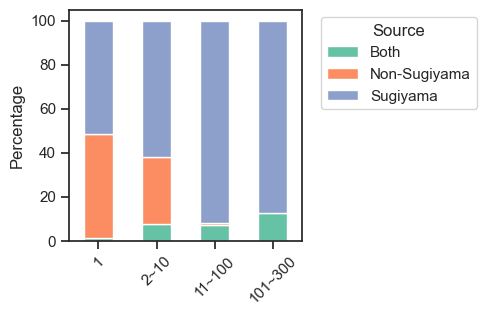

In [ ]:
plot_composition(sites,
                 'bin',
                 'source_combine',
                 palette='Set2',
                 legend_title='Source',
                 figsize=(3,3)
                )
save_pdf('fig/promi_bar_source_percentage.pdf')

## Stacked plot by site type

In [ ]:
sites['acceptor'] = sites.sub_site.str.split('_').str[1].str[0]

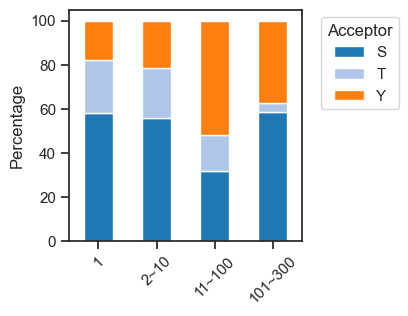

In [ ]:
plot_composition(sites,'bin',
                 'acceptor',
                 palette=sty_color,
                 figsize=(3,3),
                 legend_title='Acceptor'
                )

save_pdf('fig/promi_bar_site_percentage.pdf')

In [ ]:
pct_df=get_pct(sites,'bin','acceptor')

In [ ]:
pct_df

acceptor,S,T,Y
bin,,,
1,57.760274,24.431507,17.808219
2~10,55.809202,22.712738,21.478060
11~100,31.512497,16.361762,52.125741
101~300,58.333333,4.166667,37.500000


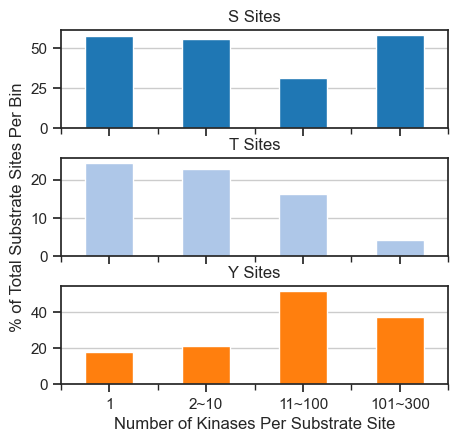

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(5, 4.6), sharex=True)
for i, (ax, acc) in enumerate(zip(axes, ['S', 'T', 'Y'])):
    pct_df[acc].plot(kind='bar', ax=ax, color=sty_color[acc])
    ax.set_title(f'{acc} Sites')
    ax.grid(axis='y')
    ax.tick_params(axis='x', labelrotation=0)
    
    # Set ylabel only on the middle plot
    if i == 1:
        ax.set_ylabel('% of Total Substrate Sites Per Bin')
    else:
        ax.set_ylabel('')  # remove label from top/bottom

axes[-1].set_xlabel('Number of Kinases Per Substrate Site')
plt.subplots_adjust(hspace=0.3)
save_pdf('fig/promi_bar_site_percentage_split.pdf')

## Save & Add num_kin to the ks_dataset

In [ ]:
sites = sites.drop(columns='source')

Let's add kinase binding info as one-hot

In [ ]:
df['kinase_uniprot_gene']=df['kinase_uniprot']+'_'+df['kinase_genes'].str.split(' ').str[0]

In [ ]:
pivot = pd.crosstab(df['sub_site'],df['kinase_uniprot_gene'])

In [ ]:
pivot = pivot.reset_index()

In [ ]:
sites = sites.merge(pivot)

In [ ]:
sites.head()

,sub_site,num_kin,bin,sub_genes,site_seq,source_combine,acceptor,O00141_SGK1,O00238_BMPR1B,O00311_CDC7,...,Q9Y2K2_SIK3,Q9Y2U5_MAP3K2,Q9Y3S1_WNK2,Q9Y463_DYRK1B,Q9Y4K4_MAP4K5,Q9Y572_RIPK3,Q9Y5S2_CDC42BPB,Q9Y6E0_STK24,Q9Y6M4_CSNK1G3,Q9Y6R4_MAP3K4
0,A0A2R8Y4L2_S158,1,1,HNRNPA1L3 HNRNPA1P48,TDRGSGKKRGFAFVTFDDHDsVDKIVIQKYHTVNGHNCEVR,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A0A2R8Y4L2_S22,3,2~10,HNRNPA1L3 HNRNPA1P48,SKSEsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTD,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A0A2R8Y4L2_S6,3,2~10,HNRNPA1L3 HNRNPA1P48,_______________MSKSEsPKEPEQLRKLFIGGLsFEtT,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A0A2R8Y4L2_S95,65,11~100,HNRNPA1L3 HNRNPA1P48,RPHKVDGRVVEPKRAVSREDsQRPDAHLTVKKIFVGGIKED,Sugiyama,S,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,A0A2R8Y4L2_T25,3,2~10,HNRNPA1L3 HNRNPA1P48,EsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTDCVV,Sugiyama,T,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# sites.to_parquet('out/unique_ks_sites.parquet')

Sites data is available upon 'Data.get_ks_unique'

The num_kin info is added to ks_dataset in Data